In [1]:
# importing Library 
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Path to get files
current_dir = os.getcwd()
relative_path = "Study_2_data/result_X201SC22101900-Z01-F019/02.FeatureAnalysis/tables/sample/featureTable_Relative"
data_path = os.path.join(current_dir,relative_path)
print(data_path)

c:\Users\Parth Doshi\Desktop\Project\Metagenomic_Data_anaylsis\Study_2_data/result_X201SC22101900-Z01-F019/02.FeatureAnalysis/tables/sample/featureTable_Relative


In [2]:
# Data Load 
# //==============================================

Phylum_file = "featureTable.sample.p.relative.xls"
Genus_file =  "featureTable.sample.g.relative.xls"
Species_file = "featureTable.sample.s.relative.xls"

# Load files using pandas
phylum_data = pd.read_table(os.path.join(data_path, Phylum_file),sep="\t")
genus_data = pd.read_table(os.path.join(data_path, Genus_file),sep="\t")
species_data = pd.read_table(os.path.join(data_path, Species_file),sep="\t")

genus_data

,Taxonomy,PRK01002,SMG01004,SMG01005,LPK01006,RRM01008,RSM01009,MSY01012,YRB01013,MML01014,...,TSY01022,DBM01024,VHW01025,SMG01026,KSS01027,KRL01028,PBB01029,DLD01030,PDD01031,Tax_detail
0,Lactobacillus,0.006691,0.001058,0.001453,0.002944,0.003607,0.256512,0.000752,0.010578,0.076350,...,0.004919,0.028203,0.006002,0.000981,0.068015,0.001083,0.028865,0.016911,0.007455,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
1,Bacteroides,0.405694,0.048274,0.030484,0.466534,0.053754,0.025845,0.008615,0.028356,0.032485,...,0.010922,0.400176,0.010985,0.006130,0.004970,0.024762,0.003148,0.043992,0.037123,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
2,Prevotella,0.209104,0.272812,0.079956,0.014439,0.388400,0.499656,0.110185,0.323661,0.365652,...,0.346192,0.040437,0.419203,0.400839,0.008271,0.237753,0.114709,0.530369,0.506805,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
3,Escherichia-Shigella,0.012986,0.018351,0.025845,0.014414,0.021079,0.008182,0.007009,0.014337,0.012145,...,0.392504,0.076184,0.009214,0.006436,0.004473,0.008360,0.490671,0.001886,0.003632,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
4,Klebsiella,0.002243,0.001402,0.001478,0.041813,0.005735,0.002128,0.236402,0.062064,0.006601,...,0.013904,0.006041,0.007799,0.004435,0.134348,0.000828,0.002536,0.004155,0.001351,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Anaerococcus,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria;p__Firmicutes;c__Clostridia;o__Pep...
318,Spiroplasma,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria;p__Firmicutes;c__Bacilli;o__Entomo...
319,LWQ8,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria;p__Patescibacteria;c__Saccharimona...
320,Microbacterium,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria;p__Actinobacteriota;c__Actinobacte...


In [3]:
# Function to perform CLR transformation with pseudocount
def clr_transform(data, pseudocount=1):
    # Ensure that the data is a pandas DataFrame
    data_frame = pd.DataFrame(data)

    # Add a pseudocount to avoid taking the log of zero
    data_frame_pseudo = data_frame + pseudocount

    # Calculate the geometric mean of the data with pseudocount
    geo_mean = np.exp(np.mean(np.log(data_frame_pseudo)))

    # Perform the CLR transformation
    clr_transformed = np.log(data_frame_pseudo / geo_mean)

    return clr_transformed

c:\Users\Parth Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


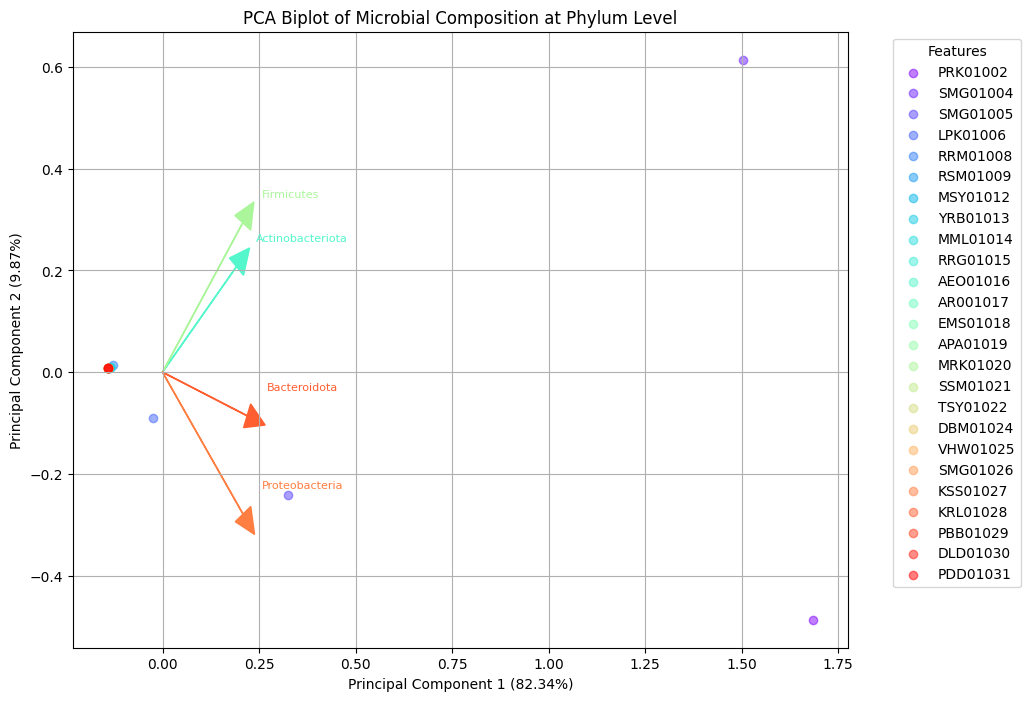

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming your data is loaded into a DataFrame called 'phylum_data'
abundance_data = phylum_data.drop(['Taxonomy', 'Tax_detail'], axis=1)  # Exclude unnecessary columns
taxonomy_data = phylum_data['Taxonomy']

# clr transformation
abundance_data_clr = clr_transform(abundance_data)

# Perform PCA with 2 components (or the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(abundance_data_clr)

# Get the top 2 features based on their loading scores
top_features_index = abs(pca.components_).argsort(axis=1)[:, -2:][:, ::-1].flatten()
top_features = abundance_data_clr.columns[top_features_index]

# Define colors for each feature
feature_colors = plt.cm.rainbow(np.linspace(0, 1, len(abundance_data_clr.columns)))

# Plot biplot with colored dots and legend
plt.figure(figsize=(10, 8))

# Plot all features individually with different colors
for i, feature in enumerate(abundance_data_clr.columns):
    plt.scatter(X_pca[:, 0][i], X_pca[:, 1][i], alpha=0.5, c=[feature_colors[i]], label=feature)

# Add vectors for top features with taxonomy labels and feature names
for i, feature in enumerate(abundance_data_clr.columns):
    if feature in top_features:
        idx = np.where(top_features == feature)[0][0]
        plt.arrow(0, 0, pca.components_[0, idx], pca.components_[1, idx],
                  head_width=0.05, head_length=0.05, fc=feature_colors[i], ec=feature_colors[i])

        # Add taxonomy label next to the vector
        plt.text(pca.components_[0, idx] + 0.05, pca.components_[1, idx] + 0.05,
                 f'{taxonomy_data[idx]}', color=feature_colors[i], fontsize=8)

# Add explained variance percentage to xlabel
plt.title('PCA Biplot of Microbial Composition at Phylum Level')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid()

# Add legend
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


c:\Users\Parth Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


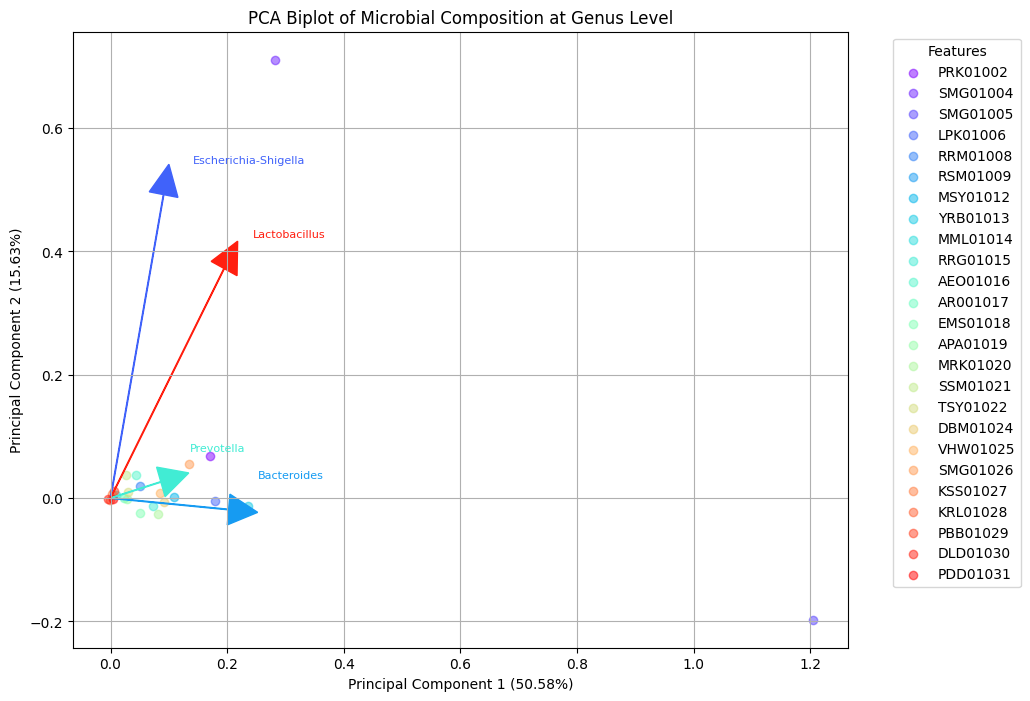

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming your data is loaded into a DataFrame called 'phylum_data'
abundance_data = genus_data.drop(['Taxonomy', 'Tax_detail'], axis=1)  # Exclude unnecessary columns
taxonomy_data = genus_data['Taxonomy']

# clr transformation
abundance_data_clr = clr_transform(abundance_data)

# Perform PCA with 2 components (or the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(abundance_data_clr)

# Get the top 2 features based on their loading scores
top_features_index = abs(pca.components_).argsort(axis=1)[:, -2:][:, ::-1].flatten()
top_features = abundance_data_clr.columns[top_features_index]

# Define colors for each feature
feature_colors = plt.cm.rainbow(np.linspace(0, 1, len(abundance_data_clr.columns)))

# Plot biplot with colored dots and legend
plt.figure(figsize=(10, 8))

# Plot all features individually with different colors
for i, feature in enumerate(abundance_data_clr.columns):
    plt.scatter(X_pca[:, 0][i], X_pca[:, 1][i], alpha=0.5, c=[feature_colors[i]], label=feature)

# Add vectors for top features with taxonomy labels and feature names
for i, feature in enumerate(abundance_data_clr.columns):
    if feature in top_features:
        idx = np.where(top_features == feature)[0][0]
        plt.arrow(0, 0, pca.components_[0, idx], pca.components_[1, idx],
                  head_width=0.05, head_length=0.05, fc=feature_colors[i], ec=feature_colors[i])

        # Add taxonomy label next to the vector
        plt.text(pca.components_[0, idx] + 0.05, pca.components_[1, idx] + 0.05,
                 f'{taxonomy_data[idx]}', color=feature_colors[i], fontsize=8)

# Add explained variance percentage to xlabel
plt.title('PCA Biplot of Microbial Composition at Genus Level')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid()

# Add legend
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


c:\Users\Parth Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


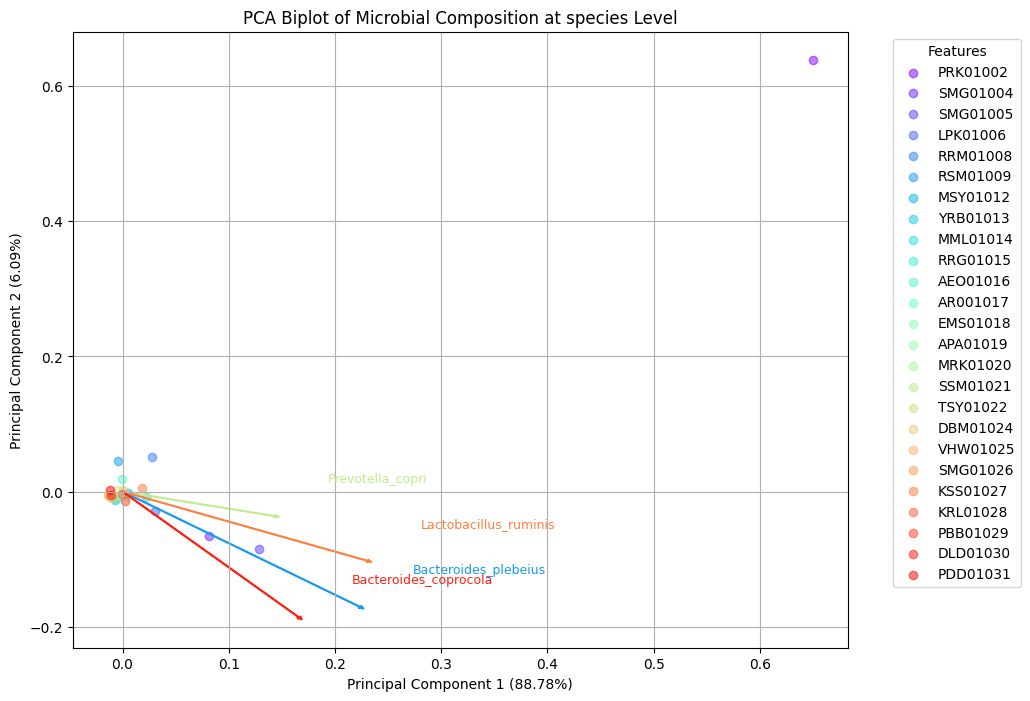

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming your data is loaded into a DataFrame called 'phylum_data'
abundance_data = species_data.drop(['Taxonomy', 'Tax_detail'], axis=1)  # Exclude unnecessary columns
taxonomy_data = species_data['Taxonomy']

# clr transformation
abundance_data_clr = clr_transform(abundance_data)

# Perform PCA with 2 components (or the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(abundance_data_clr)

# Get the top 2 features based on their loading scores
top_features_index = abs(pca.components_).argsort(axis=1)[:, -2:][:, ::-1].flatten()
top_features = abundance_data_clr.columns[top_features_index]

# Define colors for each feature
feature_colors = plt.cm.rainbow(np.linspace(0, 1, len(abundance_data_clr.columns)))

# Plot biplot with colored dots and legend
plt.figure(figsize=(10, 8))

# Plot all features individually with different colors
for i, feature in enumerate(abundance_data_clr.columns):
    plt.scatter(X_pca[:, 0][i], X_pca[:, 1][i], alpha=0.5, c=[feature_colors[i]], label=feature)

# Add vectors for top features with taxonomy labels and feature names
for i, feature in enumerate(abundance_data_clr.columns):
    if feature in top_features:
        idx = np.where(top_features == feature)[0][0]
        plt.arrow(0, 0, pca.components_[0, idx], pca.components_[1, idx],
                  head_width=0.005, head_length=0.005, fc=feature_colors[i], ec=feature_colors[i])

        # Add taxonomy label next to the vector
        plt.text(pca.components_[0, idx] + 0.05, pca.components_[1, idx] + 0.05,
                 f'{taxonomy_data[idx]}', color=feature_colors[i], fontsize=9)

# Add explained variance percentage to xlabel
plt.title('PCA Biplot of Microbial Composition at species Level')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid()

# Add legend
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
